In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [2]:
y=df['mpg']
X=df.drop(columns='mpg')

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'displacement <= 190.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.5, 'horsepower <= 70.5\nsquared_error = 35.072\nsamples = 222\nvalue = 28.642'),
 Text(0.125, 0.16666666666666666, 'squared_error = 25.405\nsamples = 71\nvalue = 33.666'),
 Text(0.375, 0.16666666666666666, 'squared_error = 22.169\nsamples = 151\nvalue = 26.28'),
 Text(0.75, 0.5, 'horsepower <= 127.0\nsquared_error = 13.001\nsamples = 170\nvalue = 16.66'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10.026\nsamples = 74\nvalue = 19.438'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.761\nsamples = 96\nvalue = 14.519')]

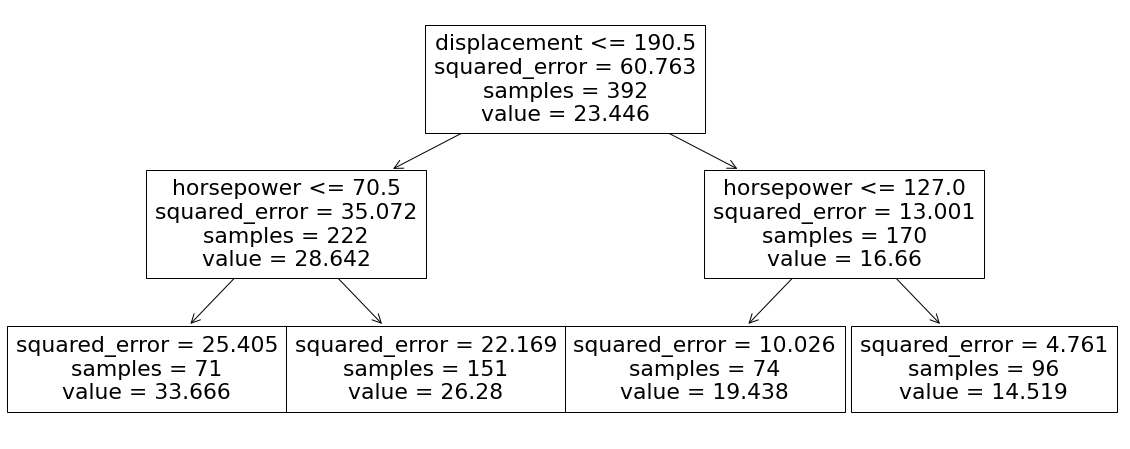

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plot_tree(reg,feature_names=X.columns)

In [8]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
train_mse=[]
test_mse=[]
for i in range(2,30):
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=reg, return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())

2 0.6586527239879318 -20.65219676083263
3 0.7772268544982668 -13.377527568897847
4 0.7687549849214637 -13.508435376849183
5 0.7972760707819793 -11.878071998942827
6 0.7898416058647388 -12.79843017310354
7 0.7630313541062332 -14.218479314341916
8 0.7874422638190912 -12.808949941548926
9 0.7907970339747858 -12.226343434114995
10 0.7638419096112322 -14.289407530964098
11 0.7957208751480126 -12.447293933454239
12 0.7539564567024586 -14.810129834514143
13 0.787096370966727 -12.919571183285607
14 0.798764975937167 -12.142650681596884
15 0.7813659770616995 -13.235732190847127
16 0.739799639030511 -15.480924050632913
17 0.778795065030191 -13.32648782862707
18 0.777946478631858 -13.147328789354106
19 0.7577549731017081 -13.798412852969818
20 0.7581254684888112 -14.142145082765335
21 0.7629241058831785 -14.279441739694903
22 0.7598076078708511 -14.380606621226875
23 0.7793082799902159 -13.480281726712107
24 0.7942743604321918 -12.286004219409282
25 0.7446321879973764 -14.87832911392405
26 0.7697

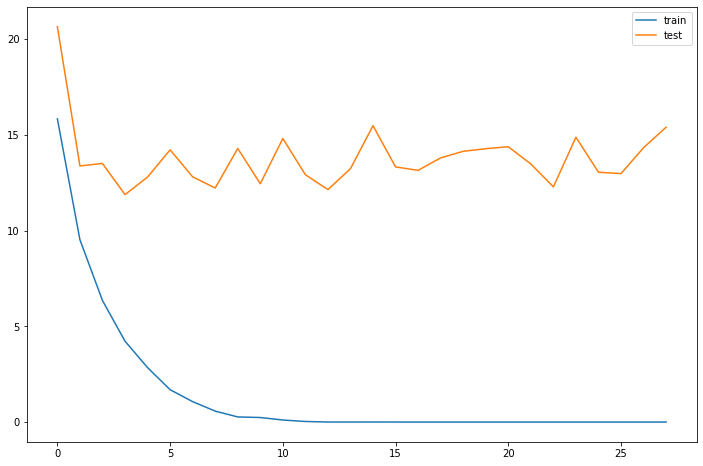

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse,label='train')
plt.plot(test_mse,label='test')
plt.legend()

## Random Forest

In [12]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
train_mse=[]
test_mse=[]
for i in range(2,30):
    reg = RandomForestRegressor(max_depth=i)
    reg.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=reg, return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())

2 0.7571988270173723 -14.726243909084442
3 0.8462186665542497 -9.326796709122348
4 0.8569173616924306 -8.623448298311335
5 0.8741582428670975 -7.622046439239094
6 0.8688842661566062 -7.652221316848133
7 0.8717782605047881 -7.732272091181199
8 0.8809062910368548 -7.275509325901821
9 0.8788209678571353 -7.377800939748832
10 0.88144268140871 -7.142573148073342
11 0.8722182955711963 -7.397124892951133
12 0.8726869969805057 -7.715348995007227
13 0.8758088652653078 -7.508226530810466
14 0.8813050869875869 -7.19688820350819
15 0.8778312902539719 -7.378033836825649
16 0.8704455120774466 -7.854012301389723
17 0.8632399949381734 -8.271272158850241
18 0.8672787813655732 -7.905280526809473
19 0.8712707316122476 -7.728085181272308
20 0.8773678270850546 -7.368587691041865
21 0.8792797372012959 -7.322138779811743
22 0.8817545967349447 -7.225144118792595
23 0.85927727859962 -8.417191265952605
24 0.8628973416612089 -8.112545714800383
25 0.8716436624801632 -7.9584567513794156
26 0.8632261924387864 -8.12

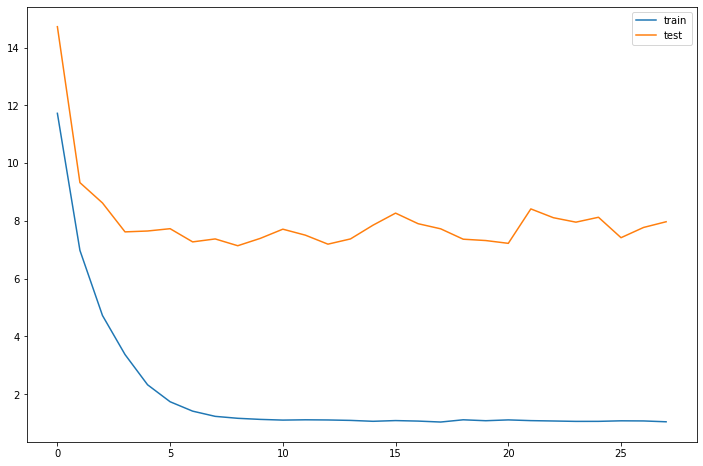

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse,label='train')
plt.plot(test_mse,label='test')
plt.legend()

## Hyper Parameter Search for Random Forest

In [14]:
param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],    
}

In [22]:
from sklearn.model_selection import GridSearchCV
kfold=KFold(n_splits=5, shuffle=True)
reg = RandomForestRegressor()
grid=GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=2, n_jobs=-1)

In [23]:
grid.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....max_depth=4, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=4, max_features=log2, n_

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
grid.best_score_

-7.161988437957564

In [26]:
grid.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}